In [79]:
## imports ##

import os.path
import tkinter
import pandas as pd
import numpy as np
import seaborn as sb
from tkinter import filedialog
import matplotlib.pyplot as plt

In [80]:
## select xlsx from file explorer ##
excel_file = filedialog.askopenfilename()

print("You've selected: " + excel_file)

csv_name = input('Please name Csv file/heatmap: ')

You've selected: C:/Users/pkalmbac/PythonProjects/List (57).xlsx


In [81]:
# Read xlsx and convert to csv #

excel_file_df = pd.read_excel(excel_file,
                              index_col = None,
                              header = 0)

c:\Users\pkalmbac\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [82]:
## defining csv file path ##

csv_path = 'C:/Users/pkalmbac/PythonProjects/GeneratedCSVs'

csv_path = os.path.join(csv_path,
                        csv_name)

In [83]:
## Convert xlsx to csv ##

excel_file_df.to_csv(csv_path,
                     index = None,
                     header = None)

In [93]:
## create dataframe from csv using value and position columns ##

csv_df = pd.DataFrame(pd.read_csv(csv_path,
                                  usecols = ['Position', 'Value']))

csv_df = csv_df.astype(str)

print(csv_df)

   Position        Value
0       H12  67.20 ng/uL
1       D01  84.60 ng/uL
2       E01  97.30 ng/uL
3       F01  93.40 ng/uL
4       G01  65.90 ng/uL
..      ...          ...
90      B10  95.20 ng/uL
91      A11  84.00 ng/uL
92      B11  52.50 ng/uL
93      A12  94.10 ng/uL
94      B12  95.30 ng/uL

[95 rows x 2 columns]


In [94]:
## ask user if there is a control ##

ctrl = input('Does this dataset include a control? (y/n)')
if ctrl == 'n':
    csv_df.loc[96] = ('C01', 'NaN')



In [95]:
## sort csv ##

csv_df = csv_df.sort_values('Position')

# Extract the float and string parts of column 'A' using a regular expression
csv_df[['Value', 'V_string']] = csv_df['Value'].str.extract(r'^(\d+\.\d+)(\D+)?$')

# Convert the 'A_float' column to float type
csv_df['Value'] = csv_df['Value'].astype(float)

csv_df = csv_df['Value'].astype(float)


# Print the updated DataFrame
#print(csv_df)

In [96]:
def create_plate(value_list): 
    num_rows = len(value_list) // 12
    plate_df = pd.DataFrame(index=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], columns=range(1, 13))
    
    for i in range(0, len(value_list)):
        row_index = chr(65 + i // 12)  
        col_index = i % 12 + 1
        column_name = f'Column_{col_index}'
        plate_df.loc[row_index, col_index] = value_list[i]
        
    return plate_df



value_list = csv_df.tolist()
df = create_plate(value_list).astype(float)


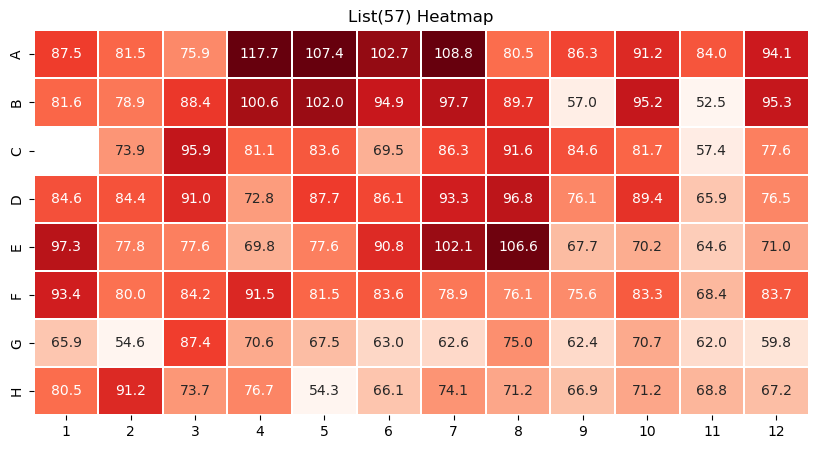

In [97]:

plt.figure(figsize=(10,5))
heatmap = sb.heatmap(df, robust = True, linewidths=.1, cmap='Reds', annot=True, fmt='.1f', cbar=False, mask=df.isnull())
heatmap.set_title(f'{csv_name}')
heatmap.figure.savefig('C:/Users/pkalmbac/PythonProjects/HeatMaps/' + f'{csv_name}' + '.png')